[View in Colaboratory](https://colab.research.google.com/github/Indrajeet90/Kaggle-Learning/blob/master/Machine_Learning_Advanced.ipynb)

# Handling Misssing Values  
We will see an example for predicting housing prices from the Melbourne Housing data.Most libraries (including scikit-learn) will give an error if one tries to build a model using data with missing values. So we'll need to choose one of the strategies below.   
   1) A Simple Option: Drop Columns with Missing Values  
   2) A Better Option: Imputation   
   3) An Extension To Imputation  

Basic Problem Set-up

In [3]:
from google.colab import files
uploaded = files.upload()

Saving melb_data.csv to melb_data.csv


In [0]:
import pandas as pd

# Load data
melb_data = pd.read_csv('melb_data.csv')

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

melb_target = melb_data.Price
melb_predictors = melb_data.drop(['Price'], axis=1)

# For the sake of keeping the example simple, we'll use only numeric predictors. 
melb_numeric_predictors = melb_predictors.select_dtypes(exclude=['object'])

**Create Function to Measure Quality of An Approach**   
We will divide our data into training and test. Next, We've loaded a function score_dataset(X_train, X_test, y_train, y_test) to compare the quality of diffrent approaches to missing values. This function reports the out-of-sample MAE score from a RandomForest.

In [0]:
# Creating a function to calculate quality of missing value treatment methods
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(melb_numeric_predictors, 
                                                    melb_target,
                                                    train_size=0.7, 
                                                    test_size=0.3, 
                                                    random_state=0)

def score_dataset(X_train, X_test, y_train, y_test):
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return mean_absolute_error(y_test, preds)

**1. Get Model Score from Dropping Columns with Missing Values**

In [22]:
cols_with_missing = [col for col in X_train.columns if X_train[col].isnull().any()]
reduced_X_train = X_train.drop(cols_with_missing, axis=1)
reduced_X_test  = X_test.drop(cols_with_missing, axis=1)
print("Mean Absolute Error from dropping columns with Missing Values:")
print(score_dataset(reduced_X_train, reduced_X_test, y_train, y_test))

Mean Absolute Error from dropping columns with Missing Values:
191151.5037344835


**2. Get Model Score from Imputation**

In [23]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import Imputer
my_imputer = Imputer()
imputed_X_train = my_imputer.fit_transform(X_train)
imputed_X_test = my_imputer.transform(X_test)
print("Mean Absolute Error from Imputation:")
print(score_dataset(imputed_X_train, imputed_X_test, y_train, y_test))

Mean Absolute Error from Imputation:
186056.3311160203


**3.Get Score from Imputation with Extra Columns Showing What Was Imputed**

In [24]:
imputed_X_train_plus = X_train.copy()
imputed_X_test_plus = X_test.copy()

cols_with_missing = (col for col in X_train.columns if X_train[col].isnull().any())
for col in cols_with_missing:
    imputed_X_train_plus[col + '_was_missing'] = imputed_X_train_plus[col].isnull()
    imputed_X_test_plus[col + '_was_missing'] = imputed_X_test_plus[col].isnull()

# Imputation
my_imputer = Imputer()
imputed_X_train_plus = my_imputer.fit_transform(imputed_X_train_plus)
imputed_X_test_plus = my_imputer.transform(imputed_X_test_plus)

print("Mean Absolute Error from Imputation while Track What Was Imputed:")
print(score_dataset(imputed_X_train_plus, imputed_X_test_plus, y_train, y_test))

Mean Absolute Error from Imputation while Track What Was Imputed:
186479.5960294083


As is common, imputing missing values allowed us to improve our model compared to dropping those columns. We got an additional boost by tracking what values had been imputed.

#Using Categorical Data

We will get an error trying to plug these variables into most machine learning models in Python without "encoding" them first. Here is the most popular method for encoding categorical variables.

**One-Hot Encoding : The Standard Approach for Categorical Data**   
One hot encoding is the most widespread approach, and it works very well unless your categorical variable takes on a large number of values. It creates new (binary) columns, indicating the presence of each possible value from the original data. Let's work through an example.    
The values in the original data are Red, Yellow and Green. We create a separate column for each possible value. Wherever the original value was Red, we put a 1 in the Red column.


**Example of hot coding**   
This data contains housing characteristics. You will use them to predict home prices, which are stored in a Series called target.

In [0]:
# Read the data
import pandas as pd
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Drop houses where the target is missing
train_data.dropna(axis=0, subset=['SalePrice'], inplace=True)

target = train_data.SalePrice

# Since missing values isn't the focus of this tutorial, we use the simplest
# possible approach, which drops these columns. 
cols_with_missing = [col for col in train_data.columns if train_data[col].isnull().any()]                                  
candidate_train_predictors = train_data.drop(['Id', 'SalePrice'] + cols_with_missing, axis=1)
candidate_test_predictors = test_data.drop(['Id'] + cols_with_missing, axis=1)
# "cardinality" means the number of unique values in a column.
# We use it as our only way to select categorical columns here. This is convenient, though a little arbitrary.
low_cardinality_cols = [cname for cname in candidate_train_predictors.columns if 
                                candidate_train_predictors[cname].nunique() < 10 and
                                candidate_train_predictors[cname].dtype == "object"]
numeric_cols = [cname for cname in candidate_train_predictors.columns if 
                                candidate_train_predictors[cname].dtype in ['int64', 'float64']]
my_cols = low_cardinality_cols + numeric_cols
train_predictors = candidate_train_predictors[my_cols]
test_predictors = candidate_test_predictors[my_cols]

Pandas assigns a data type (called a dtype) to each column or Series. Let's see a random sample of dtypes from our prediction data:

In [26]:
train_predictors.dtypes.sample(10)

Foundation    object
GrLivArea      int64
MSZoning      object
YearBuilt      int64
PoolArea       int64
MSSubClass     int64
Utilities     object
CentralAir    object
LandSlope     object
ExterQual     object
dtype: object

Object indicates a column has text (there are other things it could be theoretically be, but that's unimportant for our purposes). It's most common to one-hot encode these "object" columns, since they can't be plugged directly into most models. Pandas offers a convenient function called get_dummies to get one-hot encodings. Call it like this:

In [0]:
one_hot_encoded_training_predictors = pd.get_dummies(train_predictors)

One-hot encoding usually helps, but it varies on a case-by-case basis. In this case, there doesn't appear to be any meaningful benefit from using the one-hot encoded variables.

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

def get_mae(X, y):
    # multiple by -1 to make positive MAE score instead of neg value returned as sklearn convention
    return -1 * cross_val_score(RandomForestRegressor(50), X, y, scoring = 'neg_mean_absolute_error').mean()

predictors_without_categoricals = train_predictors.select_dtypes(exclude=['object'])

mae_without_categoricals = get_mae(predictors_without_categoricals, target)

mae_one_hot_encoded = get_mae(one_hot_encoded_training_predictors, target)

print('Mean Absolute Error when Dropping Categoricals:',mae_without_categoricals)
print('Mean Abslute Error with One-Hot Encoding:',mae_one_hot_encoded)

Mean Absolute Error when Dropping Categoricals: 18258.72892232334
Mean Abslute Error with One-Hot Encoding: 18120.8573799444


# XGBoost  
XGBoost is an implementation of the Gradient Boosted Decision Trees algorithm (scikit-learn has another version of this algorithm, but XGBoost has some technical advantages.) What is Gradient Boosted Decision Trees? We'll walk through a diagram.   
![alt text](https://i.imgur.com/e7MIgXk.png)       
We go through cycles that repeatedly builds new models and combines them into an ensemble model. We start the cycle by calculating the errors for each observation in the dataset. We then build a new model to predict those. We add predictions from this error-predicting model to the "ensemble of models."    

To make a prediction, we add the predictions from all previous models. We can use these predictions to calculate new errors, build the next model, and add it to the ensemble.    

There's one piece outside that cycle. We need some base prediction to start the cycle. In practice, the initial predictions can be pretty naive. Even if it's predictions are wildly inaccurate, subsequent additions to the ensemble will address those errors.

We will start with the data pre-loaded into train_X, test_X, train_y, test_y.

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer

data = pd.read_csv('train.csv')
data.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = data.SalePrice
X = data.drop(['SalePrice'], axis=1).select_dtypes(exclude=['object'])
train_X, test_X, train_y, test_y = train_test_split(X.as_matrix(), y.as_matrix(), test_size=0.25)

my_imputer = Imputer()
train_X = my_imputer.fit_transform(train_X)
test_X = my_imputer.transform(test_X)

**XGBoost Model:** We build and fit a model just as we would in scikit-learn.

In [30]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(train_X, train_y, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

We similarly evaluate a model and make predictions as we would do in scikit-learn.

In [32]:
# make predictions
predictions = my_model.predict(test_X)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : ",mean_absolute_error(predictions, test_y))

Mean Absolute Error :  19783.78955479452


#Model Tuning
XGBoost has a few parameters that can dramatically affect your model's accuracy and training speed. The first parameters you should understand are:

**n_estimators and early_stopping_rounds**   
**n_estimators** specifies how many times to go through the modeling cycle described above.The argument early_stopping_rounds offers a way to automatically find the ideal value. **Early stopping **causes the model to stop iterating when the validation score stops improving, even if we aren't at the hard stop for n_estimators. It's smart to set a high value for **n_estimators** and then use **early_stopping_rounds** to find the optimal time to stop iterating.

Since random chance sometimes causes a single round where validation scores don't improve, you need to specify a number for how many rounds of straight deterioration to allow before stopping. **early_stopping_rounds = 5** is a reasonable value. Thus we stop after 5 straight rounds of deteriorating validation scores.

**Learning_rate**  
Instead of getting predictions by simply adding up the predictions from each component model, we will multiply the predictions from each model by a small number before adding them in. This means each tree we add to the ensemble helps us less. In practice, this reduces the model's propensity to overfit.

So, we can use a higher value of n_estimators without overfitting. If we use early stopping, the appropriate number of trees will be set automatically.

In general, a small learning rate will yield more accurate XGBoost models, though it will also take the model longer to train since it does more iterations through the cycle.

In [33]:
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(train_X, train_y, early_stopping_rounds=5, 
             eval_set=[(test_X, test_y)], verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

**n_jobs**   
On larger datasets where runtime is a consideration, we can use parallelism to build your models faster. It's common to set the parameter n_jobs equal to the number of cores on a machine. On smaller datasets, this won't help.

# Partial Dependence Plots

Some people will argue we cannot see how machine learning models are working on any given dataset, so we can neither extract insight nor identify problems with the model.   

Partial dependence plots show how each variable or predictor affects the model's predictions. This is useful for questions like:



*  How much of wage differences between men and women are due solely to gender, as opposed to differences in education backgrounds or work experience?
*   Controlling for house characteristics, what impact do longitude and latitude have on home prices?To restate this, we want to understand how similarly sized houses would be priced in different areas, even if the homes actually at these sites are different sizes. 
*   Are health differences between two groups due to differences in their diets, or due to other factors?

Partial dependence plots can be interepreted similarly to the coefficients in linear or logistics models.








# Interpreting Partial Dependence Plots

We'll start with 2 partial dependence plots showing the relationship between Price and a couple variables from the Melbourne Housing dataset. We'll walk through how these plots are created and interpreted.

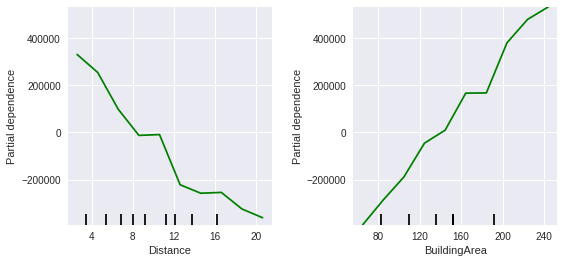

In [34]:
# XGBoost model using Melbourne housing data
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.preprocessing import Imputer

cols_to_use = ['Distance', 'Landsize', 'BuildingArea']

# function to read data, impute missing values for selected columns
def get_some_data():
    data = pd.read_csv('melb_data.csv')
    y = data.Price
    X = data[cols_to_use]
    my_imputer = Imputer()
    imputed_X = my_imputer.fit_transform(X)
    return imputed_X, y

# get_some_data is defined above.
X, y = get_some_data()
# scikit-learn originally implemented partial dependence plots only for Gradient Boosting models
# this was due to an implementation detail, and a future release will support all model types.
my_model = GradientBoostingRegressor()
# fit the model as usual
my_model.fit(X, y)
# Here we make the plot
my_plots = plot_partial_dependence(my_model,       
                                   features=[0, 2], # column numbers of plots we want to show
                                   X=X,            # raw predictors data.
                                   feature_names=['Distance', 'Landsize', 'BuildingArea'], # labels on graphs
                                   grid_resolution=10) # number of values to plot on x axis

**The partial dependence plot is calculated only after the model has been fit. **The model is fit on real data. In that real data, houses in different parts of town may differ in myriad ways but after the model is fit, we could start by taking all the characteristics of a single house. Say, a house with 2 bedrooms, 2 bathrooms, a large lot, an age of 10 years, etc.      

We then use the model to predict the price of that house, but we change the distance variable before making a prediction. We first predict the price for that house when sitting distance to 4. We then predict it's price setting distance to 5. Then predict again for 6. And so on. We trace out how predicted price changes (on the vertical axis) as we move from small values of distance to large values (on the horizontal axis).   

Because of interactions, the partial dependence plot for a single house may be atypical. So, instead we repeat that mental experiment with multiple houses, and we plot the average predicted price on the vertical axis. You'll see some negative numbers. That doesn't mean the price would sell for a negative price. Instead it means the prices would have been less than the actual average price for that distance.       

In the left graph, we see house prices fall as we get further from the central business distract. Though there seems to be a nice suburb about 16 kilometers out, where home prices are higher than many nearer and further suburbs.

The right graph shows the impact of building area, which is interpreted similarly. A larger building area means higher prices.

Partial dependence plots are a great way (though not the only way) to extract insights from complex models. These can be incredibly powerful for communicating those insights to colleagues or non-technical users.

# Pipelines

A pipeline bundles preprocessing and modeling steps so we can use the whole bundle as if it were a single step.

Many data scientists hack together models without pipelines, but Pipelines have some important benefits. Those include:

*  **Cleaner Code:** We won't need to keep track of your training (and testing) data at each step of processing. Accounting for data at each step of processing can get messy. With a pipeline,we don't need to manually keep track of each step.
*  **Fewer Bugs:** There are fewer opportunities to mis-apply a step or forget a pre-processing step.
*  **Easier to Productionize:** It can be surprisingly hard to transition a model from a prototype to something deployable at scale. We won't go into the many related concerns here, but pipelines can help.
*   **More Options For Model Testing:** We will see an example in the next tutorial, which covers cross-validation.

We will use Melbourne dataset for our exercise.






In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read Data
data = pd.read_csv('melb_data.csv')
cols_to_use = ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt']
X = data[cols_to_use]
y = data.Price
train_X, test_X, train_y, test_y = train_test_split(X, y)

We have a modeling process that uses an Imputer to fill in missing values, followed by a RandomForestRegressor to make predictions. These can be bundled together with the **make_pipeline** function as shown below.

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer

my_pipeline = make_pipeline(Imputer(), RandomForestRegressor())

We can now fit and predict using this pipeline as a fused whole.

In [0]:
my_pipeline.fit(train_X, train_y)
predictions = my_pipeline.predict(test_X)

For comparison, here is the code to do the same thing without pipelines

In [0]:
my_imputer = Imputer()
my_model = RandomForestRegressor()

imputed_train_X = my_imputer.fit_transform(train_X)
imputed_test_X = my_imputer.transform(test_X)
my_model.fit(imputed_train_X, train_y)
predictions = my_model.predict(imputed_test_X)

Most scikit-learn objects are either transformers or models.

**Transformers **are for pre-processing before modeling. The Imputer class (for filling in missing values) is an example of a transformer. Over time, we will learn many more transformers, and you will frequently use multiple transformers sequentially.

**Models** are used to make predictions. We will usually preprocess your data (with transformers) before putting it in a model.

We can tell if an object is a transformer or a model by how we apply it. After fitting a transformer, we apply it with the transform command. After fitting a model, we apply it with the predict command. A pipeline must start with transformer steps and end with a model. This is what we want anyway.

# Cross Validation
Machine learning is an iterative process.

We will face choices about predictive variables to use, what types of models to use,what arguments to supply those models, etc. We make these choices in a data-driven way by measuring model quality of various alternatives.

You've already learned to use train_test_split to split the data, so you can measure model quality on the test data. Cross-validation extends this approach to model scoring (or "model validation.") Compared to train_test_split, cross-validation gives you a more reliable measure of your model's quality, though it takes longer to run.

# The Shortcoming of Train-Test Split
Imagine  a dataset with 5000 rows. The train_test_split function has an argument for test_size that  can be used to decide how many rows go to the training set and how many go to the test set. The larger the test set, the more reliable our measures of model quality will be. At an extreme, we could imagine having only 1 row of data in the test set. If you compare alternative models, which one makes the best predictions on a single data point will be mostly a matter of luck.

But we can only get a large test set by removing data from our training data, and smaller training datasets mean worse models. In fact, the ideal modeling decisions on a small dataset typically aren't the best modeling decisions on large datasets.

# The Cross-Validation Procedure
In cross-validation, we run our modeling process on different subsets of the data to get multiple measures of model quality. For example, we could have 5 folds or experiments. We divide the data into 5 pieces, each being 20% of the full dataset.
![alt text](https://i.stack.imgur.com/1fXzJ.png)
We run an experiment called experiment 1 which uses the first fold as a holdout set, and everything else as training data. This gives us a measure of model quality based on a 20% holdout set, much as we got from using the simple train-test split.
We then run a second experiment, where we hold out data from the second fold (using everything except the 2nd fold for training the model.) This gives us a second estimate of model quality. We repeat this process, using every fold once as the holdout. Putting this together, 100% of the data is used as a holdout at some point.

Returning to our example above from train-test split, if we have 5000 rows of data, we end up with a measure of model quality based on 5000 rows of holdout (even if we don't use all 5000 rows simultaneously.

# Trade-offs Between Cross-Validation and Train-Test Split
Cross-validation gives a more accurate measure of model quality, which is especially important if you are making a lot of modeling decisions. However, it can take more time to run, because it estimates models once for each fold. So it is doing more total work.

On small datasets, the extra computational burden of running cross-validation isn't a big deal.For the same reasons, a simple train-test split is sufficient for larger datasets.There's no simple threshold for what constitutes a large vs small dataset. Alternatively, we can run cross-validation and see if the scores for each experiment seem close. If each experiment gives the same results, train-test split is probably sufficient.

**Cross-validation** example using Melbourne data

In [0]:
import pandas as pd
data = pd.read_csv('melb_data.csv')
cols_to_use = ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt']
X = data[cols_to_use]
y = data.Price

Then specify a pipeline of our modeling steps.

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer
my_pipeline = make_pipeline(Imputer(), RandomForestRegressor())

Finally get the cross-validation scores:

In [41]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(my_pipeline, X, y, scoring='neg_mean_absolute_error')
print(scores)

[-310659.07801954 -301505.90598152 -298776.70800048]


Scikit-learn has a convention where all metrics are defined so a high number is better. Using negatives here allows them to be consistent with that convention, though negative MAE is almost unheard of elsewhere.We typically want a single measure of model quality to compare between models. So we take the average across experiments.

In [43]:
print('Mean Absolute Error:', (-1 * scores.mean()))

Mean Absolute Error: 303647.23066717666


# Data Leakage
 Data leakage causes a model to look accurate until one starts making decisions with the model, and then the model becomes very inaccurate. 

There are two main types of leakage: **Leaky Predictors** and a **Leaky Validation Strategies**.

**Leaky Predictors**   
This occurs when your predictors include data that will not be available at the time you make predictions.To prevent this type of data leakage, any variable updated (or created) after the target value is realized should be excluded. Because when we use this model to make new predictions, that data won't be available to the model.

**Leaky Validation Strategy**   
A much different type of leak occurs when one is not careful distinguishing training data from validation data. For example, this happens if one runs preprocessing (like fitting the Imputer for missing values) before calling train_test_split. Validation is meant to be a measure of how the model does on data it hasn't considered before. 

# Example
We will use a small dataset about credit card applications, and we will build a model predicting which applications were accepted (stored in a variable called card). Here is a look at the data:

In [44]:
from google.colab import files
uploaded = files.upload()

Saving AER_credit_card_data.csv to AER_credit_card_data.csv


In [45]:
import pandas as pd

data = pd.read_csv('AER_credit_card_data.csv', true_values = ['yes'],false_values = ['no'])
print(data.head())

   card  reports       age  income     share  expenditure  owner  selfemp  \
0  True        0  37.66667  4.5200  0.033270   124.983300   True    False   
1  True        0  33.25000  2.4200  0.005217     9.854167  False    False   
2  True        0  33.66667  4.5000  0.004156    15.000000   True    False   
3  True        0  30.50000  2.5400  0.065214   137.869200  False    False   
4  True        0  32.16667  9.7867  0.067051   546.503300   True    False   

   dependents  months  majorcards  active  
0           3      54           1      12  
1           3      34           1      13  
2           4      58           1       5  
3           0      25           1       7  
4           2      64           1       5  


In [48]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

y = data.card
X = data.drop(['card'], axis=1)

# Since there was no preprocessing, we didn't need a pipeline here. Used anyway as best practice
modeling_pipeline = make_pipeline(RandomForestClassifier())
cv_scores = cross_val_score(modeling_pipeline, X, y, scoring='accuracy')
print("Cross-val accuracy:", cv_scores.mean())

Cross-val accuracy: 0.9780130461793332


It's very rare to find models that are accurate 98% of the time. It happens, but it's rare enough that we should inspect the data more closely to see if it is target leakage.  
Here is a summary of the data, which you can also find under the data tab:

**card:** Dummy variable, 1 if application for credit card accepted, 0 if not  
**reports:** Number of major derogatory reports  
**age:** Age n years plus twelfths of a year  
**income**: Yearly income (divided by 10,000)  
**share:** Ratio of monthly credit card expenditure to yearly income  
**expenditure**: Average monthly credit card expenditure  
**owner: **1 if owns their home, 0 if rent  
**selfempl: **1 if self employed, 0 if not.  
**dependents: **1 + number of dependents  
**months:** Months living at current address  
**majorcards:** Number of major credit cards held  
**active: **Number of active credit accounts  
A few variables look suspicious. For example, does expenditure mean expenditure on this card or on cards used before appying?

At this point, basic data comparisons can be very helpful:

In [52]:
expenditures_cardholders = data.expenditure[data.card]
expenditures_noncardholders = data.expenditure[~data.card]

print('Fraction of those who received a card with no expenditures:',\
      ( expenditures_cardholders == 0).mean())
print("Fraction of those who didn't receive a card with no expenditures:", \
      (expenditures_noncardholders == 0).mean())

Fraction of those who received a card with no expenditures: 0.020527859237536656
Fraction of those who didn't receive a card with no expenditures: 1.0


Since share is partially determined by expenditure, it should be excluded too. The variables active, majorcards are a little less clear, but from the description, they sound concerning. In most situations, it's better to be safe than sorry if you can't track down the people who created the data to find out more.

We would run a model without leakage as follows:

In [53]:
potential_leaks = ['expenditure', 'share', 'active', 'majorcards']
X2 = X.drop(potential_leaks, axis=1)
cv_scores = cross_val_score(modeling_pipeline, X2, y, scoring='accuracy')
print("Cross-val accuracy: %f" %cv_scores.mean())

Cross-val accuracy: 0.818042


This accuracy is quite a bit lower, which on the one hand is disappointing. However, we can expect it to be right about 80% of the time when used on new applications, whereas the leaky model would likely do much worse then that (even in spite of it's higher apparent score in cross-validation.).